# Project 2: Visual Forecast: Illuminating the Global and Chinese EV Market Growth

This notebook contains the code for reproducing and improving visualizations of China's electric vehicle (EV) market data, based on forecasts from EV-Volumes.

## Overview
- **Cell 1**: Reproduction of the original complex chart showing China's BEV and PHEV demand.
- **Cell 2**: Improved visualization of BEV and PHEV volume trends.
- **Cell 3**: Improved visualization of PEV market share.
- **Cell 4**: Improved visualization of PEV growth rates.

The original chart was complex with multiple data series. We improved it by separating into focused, clearer charts.

### **Team Members**
&nbsp;Team id: &nbsp;T9 

<table align="left">
  <tr>
    <th style="width: 200px; text-align: center;">Name</th>
    <th style="width: 200px; text-align: center;">Student_ID</th>
  </tr>
  <tr>
    <td style="text-align: center;">Hongkun Tian</td>
    <td style="text-align: center;">320230942381</td>
  </tr>
  <tr>
    <td style="text-align: center;">Zhiye Wang</td>
    <td style="text-align: center;">320230942491</td>
  </tr>
  <tr>
    <td style="text-align: center;">Zilin Wang</td>
    <td style="text-align: center;">320230942531</td>
  </tr>
</table>

<div style="clear: both;"></div>
<div><p>&nbsp;Date: 2025-12-17</p></div>

## Cell 1: Reproduction of the Original Chart

This cell reproduces the original complex visualization from the source, showing China's BEV and PHEV demand with multiple data series including light vehicle sales, EV volumes, market share, and growth rates. The chart uses dual y-axes and stacked bars.

**Step-by-step instructions:**
1. Import necessary libraries: pandas for data handling, matplotlib for plotting, numpy for arrays.
2. Define color palette for consistency.
3. Create data dictionary with years and corresponding values for light vehicle sales, BEV/PHEV volumes, PEV share, and growth rates.
4. Convert data to DataFrame for easier manipulation.
5. Set up the figure and primary axis (ax1) for bars and area fill.
6. Add area fill for light vehicle sales background.
7. Plot stacked bars for BEV and PHEV volumes.
8. Add text labels on bars for recent years.
9. Create secondary axis (ax3) for lines (share and growth).
10. Plot PEV share and growth lines, with annotations.
11. Customize axes, remove spines, add grid, and set labels.
12. Create combined legend and display the plot.

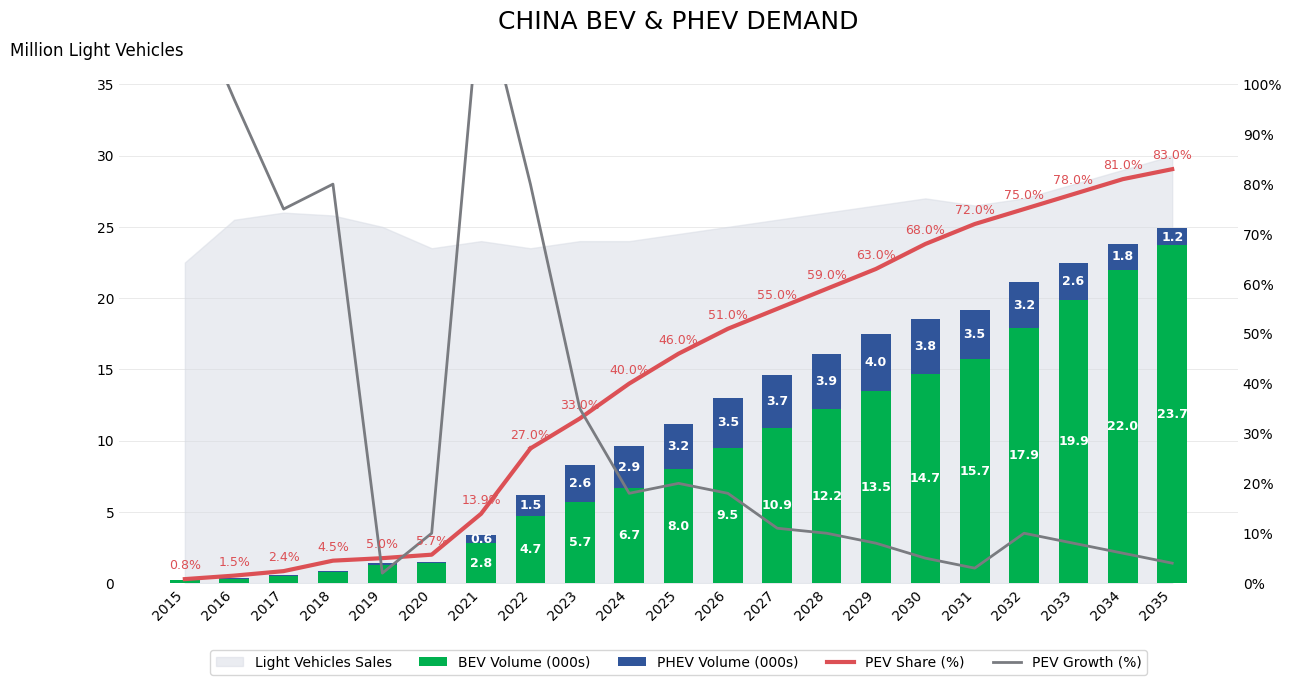

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

colors = {
    "bev": "#00b04f",
    "phev": "#30559a",
    "share": "#dc5055",
    "growth": "#797b80",    
    "lv_sales_bg": "#d7dbe4",
    "grid": "#e6e6e6"
}

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
         2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035]

data = {
    "Year": years,
    "Light Vehicle Sales (millions)": [22.5, 25.5, 26, 25.8, 25, 23.5, 24, 23.5, 24, 24, 24.5, 25, 25.5, 26, 26.5, 27, 26.5, 27, 28, 29, 30],
    "BEV Volume (thousands)": [0.2, 0.3, 0.5, 0.8, 1.3, 1.4, 2.8, 4.7, 5.7, 6.7, 8.0, 9.5, 10.9, 12.2, 13.5, 14.7, 15.7, 17.9, 19.9, 22.0, 23.7],
    "PHEV Volume (thousands)": [0, 0.05, 0.08, 0.08, 0.1, 0.1, 0.6, 1.5, 2.6, 2.9, 3.2, 3.5, 3.7, 3.9, 4.0, 3.8, 3.5, 3.2, 2.6, 1.8, 1.2],
    "PEV Share (%)": [0.8, 1.5, 2.4, 4.5, 5.0, 5.7, 13.9, 27, 33, 40, 46, 51, 55, 59, 63, 68, 72, 75, 78, 81, 83],
    "PEV Growth (%)": [120, 97, 75, 80, 2, 10, 120, 80, 35, 18, 20, 18, 11, 10, 8, 5, 3, 10, 8, 6, 4]
}

df = pd.DataFrame(data)

plt.figure(figsize=(13, 7))
ax1 = plt.gca()

ax1.fill_between(
    df["Year"],
    df["Light Vehicle Sales (millions)"],
    color=colors["lv_sales_bg"],
    alpha=0.5,
    label="Light Vehicles Sales"
)

ax1.set_ylabel("Million Light Vehicles", fontsize=12)
ax1.yaxis.set_label_position("left")
ax1.yaxis.set_label_coords(-0.02, 1.05)
ax1.yaxis.label.set_rotation(0)


ax1.set_ylim(0, 35)

width = 0.6
ax1.bar(df["Year"], df["BEV Volume (thousands)"],
        color=colors["bev"], width=width, label="BEV Volume (000s)")
ax1.bar(df["Year"], df["PHEV Volume (thousands)"],
        bottom=df["BEV Volume (thousands)"],
        color=colors["phev"], width=width, label="PHEV Volume (000s)")

for i, year in enumerate(df["Year"]):
    if year >= 2021:
        bev = df["BEV Volume (thousands)"][i]
        phev = df["PHEV Volume (thousands)"][i]

        ax1.text(year, bev/2, f"{bev:.1f}", ha="center", va="center",
                 color="white", fontsize=9, fontweight="bold")
        ax1.text(year, bev + phev/2, f"{phev:.1f}", ha="center", va="center",
                 color="white", fontsize=9, fontweight="bold")

ax3 = ax1.twinx()
ax3.set_ylim(0, 100)
ax3.set_yticks(np.arange(0, 101, 10))
ax3.set_ylabel("")


split_year = 2022

df_pre = df[df["Year"] <= split_year]

df_after = df[df["Year"] >= split_year].copy()
df_after["PEV Share (%)"] = df_after["PEV Share (%)"].round(0)  

ax3.plot(df_pre["Year"], df_pre["PEV Share (%)"],
         color=colors["share"], linewidth=3)

ax3.plot(df_after["Year"], df_after["PEV Share (%)"],
         color=colors["share"], linewidth=3, label="PEV Share (%)")

for x, y in zip(df["Year"], df["PEV Share (%)"]):
    ax3.text(x, y + 2, f"{y}%", color=colors["share"], fontsize=9, ha="center")

ax3.plot(df["Year"], df["PEV Growth (%)"],
         color=colors["growth"], linewidth=2, label="PEV Growth (%)")

ax3.set_yticklabels([f"{int(t)}%" for t in ax3.get_yticks()])

for ax in [ax1, ax3]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

ax1.yaxis.grid(True, linewidth=0.6, color=colors["grid"])
ax1.set_axisbelow(True)
ax1.axhline(y=0, linewidth=0.6, color=colors["grid"], zorder=0)#0grid

ax1.set_xticks(df["Year"])
ax1.set_xticklabels(df["Year"])
ax1.set_xticklabels(df["Year"], rotation=45, ha='right')

plt.title("CHINA BEV & PHEV DEMAND", fontsize=18, pad=40)


lines, labels = [], []
for ax in [ax1, ax3]:
    l, lb = ax.get_legend_handles_labels()
    lines += l
    labels += lb
    ax.tick_params(axis="both", which="both", length=0)

plt.legend(lines, labels,
           loc="upper center",
           bbox_to_anchor=(0.5, -0.12),   
           ncol=5,                        
           fontsize=10)

plt.tight_layout()
plt.show()


## Cell 2: Improved BEV & PHEV Volume Chart

This cell creates an improved line chart focusing on the volume trends of BEV and PHEV sales. It uses smooth curves and scatter points for better readability, with annotations highlighting key points like the start of PHEV decline.

**Step-by-step instructions:**
1. Import matplotlib, numpy, and scipy for plotting and smoothing.
2. Define years, BEV, and PHEV data arrays.
3. Set colors for BEV and PHEV.
4. Define a smooth function using cubic spline interpolation.
5. Create figure and axis.
6. Smooth the data and plot lines for BEV and PHEV.
7. Add scatter points for original data.
8. Set x-ticks to every other year for clarity.
9. Calculate and annotate the start of PHEV decline.
10. Add title, labels, legend, and remove unnecessary spines.
11. Tight layout and show plot.

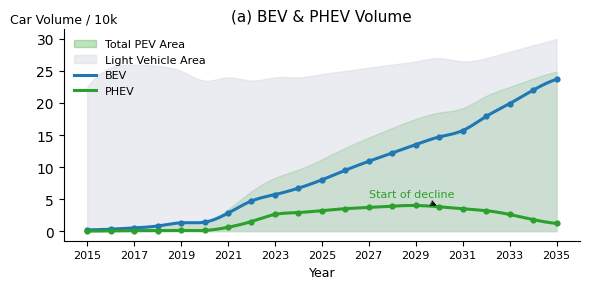

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 1: Define data arrays for years, BEV, PHEV, and light vehicle sales
years = np.array([
    2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
    2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035
])
bev = np.array([0.2, 0.3, 0.5, 0.8, 1.3, 1.4, 2.8, 4.7, 5.7, 6.7, 8.0, 9.5, 10.9, 12.2, 13.5, 14.7, 15.7, 17.9, 19.9, 22.0, 23.7])
phev = np.array([0.0, 0.05, 0.08, 0.08, 0.1, 0.1, 0.6, 1.5, 2.6, 2.9, 3.2, 3.5, 3.7, 3.9, 4.0, 3.8, 3.5, 3.2, 2.6, 1.8, 1.2])
lv_sales = np.array([22.5, 25.5, 26, 25.8, 25, 23.5, 24, 23.5, 24, 24, 24.5, 25, 25.5, 26, 26.5, 27, 26.5, 27, 28, 29, 30])

# Step 2: Define colors
c_bev = "#1f77b4"
c_phev = "#2ca02c"
c_lv = "#d7dbe4"

# Step 3: Define smoothing function
def smooth(x, y, points=300):
    x_s = np.linspace(x.min(), x.max(), points)
    spline = make_interp_spline(x, y, k=3)
    y_s = spline(x_s)
    return x_s, y_s

# Step 4: Create figure and smooth data
fig, ax = plt.subplots(figsize=(6,3))
xs, bev_s = smooth(years, bev)
xs2, phev_s = smooth(years, phev)
xs3, lv_s = smooth(years, lv_sales)

# Step 5: Add area fills for background context
ax.fill_between(xs, 0, bev_s + phev_s, color=c_phev, alpha=0.3, label="Total PEV Area")
ax.fill_between(xs3, 0, lv_s, color=c_lv, alpha=0.5, label="Light Vehicle Area")

# Step 6: Plot smoothed lines and scatter points
ax.plot(xs, bev_s, color=c_bev, linewidth=2.2, label="BEV")
ax.plot(xs2, phev_s, color=c_phev, linewidth=2.2, label="PHEV")
ax.scatter(years, bev, s=12, color=c_bev, zorder=3)
ax.scatter(years, phev, s=12, color=c_phev, zorder=3)

# Step 7: Customize x-axis
xticks = years[::2]
ax.set_xticks(xticks)
ax.set_xticklabels([str(y) for y in xticks], fontsize=8, rotation=0)

# Step 8: Add annotation for PHEV decline
decline_start_idx = np.where(np.diff(phev) < 0)[0][0] + 1
ax.annotate("Start of decline",
            xy=(years[decline_start_idx], phev[decline_start_idx]),
            xytext=(years[decline_start_idx]-3, phev[decline_start_idx]+1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->", lw=1),
            fontsize=8,
            color=c_phev)

# Step 9: Add title, labels, legend
ax.set_title("(a) BEV & PHEV Volume", fontsize=11)
ax.set_ylabel("Car Volume / 10k", fontsize=9)
ax.set_xlabel("Year", fontsize=9)
ax.yaxis.set_label_coords(-0.0, 1.02)
ax.yaxis.label.set_rotation(0)

ax.legend(fontsize=8, loc="upper left", frameon=False)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Step 10: Save and show plot
plt.tight_layout()
# plt.savefig('F:\\KeCheng\\zzl\\project2\\graphs\\modify1.png')
plt.show()

## Cell 3: Improved PEV Share Chart

This cell generates a dedicated line chart for PEV (Plug-in Electric Vehicle) market share, emphasizing the rapid growth period from 2020 to 2025 with an annotation.

**Step-by-step instructions:**
1. Import libraries for plotting and smoothing.
2. Define years and share data arrays.
3. Set color for share.
4. Define smooth function.
5. Create figure and axis.
6. Smooth and plot the share line.
7. Set x-ticks.
8. Identify rapid growth period and add annotation.
9. Add title, labels, legend, and customize spines.
10. Set y-limits and save/show plot.

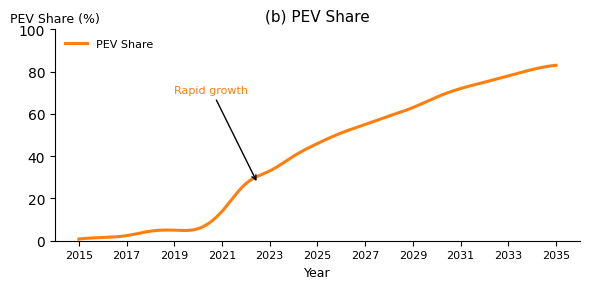

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 1: Define data for years and PEV share
years = np.array([
    2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
    2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035
])
share = np.array([0.8, 1.5, 2.4, 4.5, 5.0, 5.7, 13.9, 27, 33, 40, 46, 51, 55, 59, 63, 68, 72, 75, 78, 81, 83])

# Step 2: Define color
c_share = "#ff7f0e"

# Step 3: Define smoothing function
def smooth(x, y, points=300):
    x_s = np.linspace(x.min(), x.max(), points)
    spline = make_interp_spline(x, y, k=3)
    y_s = spline(x_s)
    return x_s, y_s

# Step 4: Create figure and plot smoothed share line
fig, ax = plt.subplots(figsize=(6,3))
xs, share_s = smooth(years, share)
ax.plot(xs, share_s, color=c_share, linewidth=2.2, label="PEV Share")

# Step 5: Customize x-axis
xticks = years[::2]
ax.set_xticks(xticks)
ax.set_xticklabels([str(y) for y in xticks], fontsize=8, rotation=0)

# Step 6: Identify and annotate rapid growth period
rapid_idx = (years >= 2020) & (years <= 2025)
rapid_x = years[rapid_idx]
rapid_y = share[rapid_idx]

ax.annotate("Rapid growth",
            xy=(2022.5, share[list(years).index(2022)]),
            xytext=(2019, 70),
            arrowprops=dict(facecolor='black', arrowstyle="->", lw=1),
            fontsize=8,
            color=c_share)

# Step 7: Add title, labels, legend
ax.set_title("(b) PEV Share", fontsize=11)
ax.set_ylabel("PEV Share (%)", fontsize=9)
ax.set_xlabel("Year", fontsize=9)
ax.yaxis.set_label_coords(-0.00, 1.02)
ax.yaxis.label.set_rotation(0)

ax.legend(fontsize=8, loc="upper left", frameon=False)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(0, 100)

# Step 8: Save and show plot
plt.tight_layout()
# plt.savefig('F:\\KeCheng\\zzl\\project2\\graphs\\modify2.png')
plt.show()

## Cell 4: Improved PEV Growth Rate Chart

This cell creates a chart for PEV growth rates, showing the peak in 2021 and the subsequent decline as the market matures.

**Step-by-step instructions:**
1. Import libraries.
2. Define years and growth data.
3. Set color for growth.
4. Define smooth function.
5. Create figure and axis.
6. Smooth and plot growth line.
7. Add text for peak value.
8. Set x-ticks and labels.
9. Add title, labels, customize spines.
10. Save and show plot.

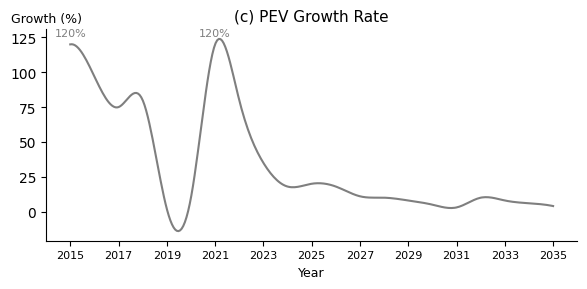

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 1: Define data for years and growth rates
years = np.array([
    2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
    2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035
])
growth = np.array([120, 97, 75, 80, 2, 10, 120, 80, 35, 18, 20, 18, 11, 10, 8, 5, 3, 10, 8, 6, 4])

# Step 2: Define color
c_growth = "#7f7f7f"

# Step 3: Define smoothing function
def smooth(x, y, points=300):
    x_s = np.linspace(x.min(), x.max(), points)
    spline = make_interp_spline(x, y, k=3)
    y_s = spline(x_s)
    return x_s, y_s

# Step 4: Create figure and plot smoothed growth line
fig, ax = plt.subplots(figsize=(6,3))
xs, growth_s = smooth(years, growth)
ax.plot(xs, growth_s, color=c_growth)

# Step 5: Add text for peak value
for x, y in zip(years, growth):
    if y == 120:
        ax.text(
            x, y + 6,
            f"{y}%",
            fontsize=8,
            ha="center",
            color=c_growth
        )

# Step 6: Customize x-axis
xticks = years[::2]
ax.set_xticks(xticks)
ax.set_xticklabels([str(y) for y in xticks], fontsize=8, rotation=0)

# Step 7: Add title, labels
ax.set_title("(c) PEV Growth Rate", fontsize=11)
ax.set_ylabel("Growth (%)", fontsize=9)
ax.set_xlabel("Year", fontsize=9)
ax.yaxis.set_label_coords(-0.00, 1.02)
ax.yaxis.label.set_rotation(0)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Step 8: Save and show plot
plt.tight_layout()
# plt.savefig('F:\\KeCheng\\zzl\\project2\\graphs\\modify3.png')
plt.show()